In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## raw data set

In [108]:
df = pd.read_csv('survey_results_public.csv')
dfsc = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText
lang = pd.read_csv('lang.csv')
# df.head(3)

In [109]:
dfsc['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [110]:
dfsc.head(6)

Column
Respondent    Randomized respondent ID number (not in order ...
MainBranch    Which of the following options best describes ...
Hobbyist                                Do you code as a hobby?
Age           What is your age (in years)? If you prefer not...
Age1stCode    At what age did you write your first line of c...
CompFreq       Is that compensation weekly, monthly, or yearly?
Name: QuestionText, dtype: object

## Data Preparation & Cleaning

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions


In [111]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]
len(selected_columns)

20

In [112]:
survey_df = df[selected_columns].copy()
schema = dfsc[selected_columns].copy()
survey_df.DevType.to_frame()

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


In [113]:
survey_df.shape
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [114]:
survey_df.Age1stCode.unique()
survey_df.YearsCode.unique()
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [115]:
survey_df.Age1stCode

0         13
1         19
2         15
3         18
4         16
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 64461, dtype: object

In [116]:
survey_df.Age1stCode = pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df.YearsCode = pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

In [117]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [118]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [119]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [120]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [121]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [122]:
survey_df.Gender

0        Man
1        NaN
2        NaN
3        Man
4        Man
        ... 
64456    NaN
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Gender, Length: 64306, dtype: object

In [123]:
survey_df.sample(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
53300,Hong Kong (S.A.R.),34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,15.0,15.0,11.0,C#;Python;Scala,Rust,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Data or business analyst;Developer, front-end;...",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Not at all important/not necessary
18845,France,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,10.0,2.0,Bash/Shell/PowerShell;C;C++;Go;Python,Bash/Shell/PowerShell;C;C++;Go;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"DevOps specialist;Engineer, site reliability;S...",36.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Very important


In [124]:
survey_df.drop(survey_df[survey_df.Country=='NaN'].index,inplace=True)

In [125]:
schema.Country

'Where do you live?'

In [126]:
survey_df['Country'].nunique()

183

In [127]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

In [128]:
xpos = np.arange(len(survey_df['Country'].index))
xpos

array([    0,     1,     2, ..., 64303, 64304, 64305])

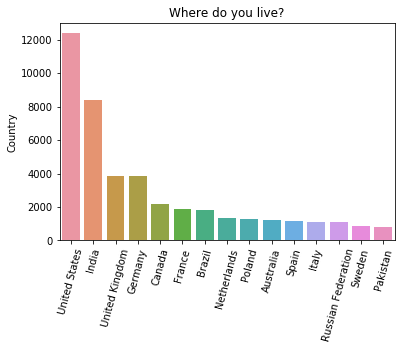

In [129]:
plt.title(schema.Country)
# plt.bar(top_countries.index,top_countries)  # # using seaborn
sns.barplot(top_countries.index,top_countries)  # using seaborn
plt.xticks(rotation=75)
plt.show()

In [130]:
survey_df = pd.merge(survey_df,lang,on='Country',how='left')

In [131]:
survey_df[['Country','Languages Spoken']]
# x = survey_df.head(5)

,Country,Languages Spoken
0,Germany,German
1,United Kingdom,"English, Welsh, Scots Gaelic"
2,Russian Federation,NaN
3,Albania,"Albanian (Tosk is the official dialect), Greek"
4,United States,"English 82%, Spanish 11% (2000)"
...,...,...
64301,United States,"English 82%, Spanish 11% (2000)"
64302,Morocco,"Arabic (official), Berber dialects, French oft..."
64303,Viet Nam,NaN
64304,Poland,Polish 98% (2002)


In [132]:
xx = 0
for i in survey_df['Languages Spoken']:
    if 'English' in str(i):
        survey_df.loc[xx,['Languages Spoken']] = ['English']
    else:
        survey_df.loc[xx,['Languages Spoken']] = ['No English']
    xx+=1  

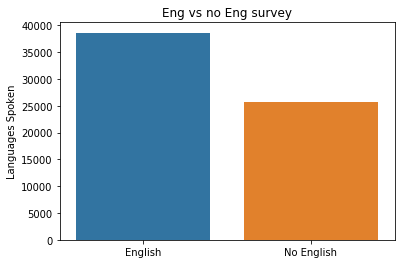

In [133]:
langc = survey_df['Languages Spoken'].value_counts()
plt.title('Eng vs no Eng survey')
sns.barplot(langc.index,langc)  # using seaborn
plt.show()

In [134]:
langc.index

Index(['English', 'No English'], dtype='object')

In [135]:
zz = survey_df['Languages Spoken'].value_counts().sum()
zz

64306

In [136]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

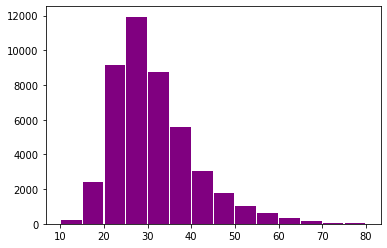

In [137]:
# in case of histogram matplotlib & seaborn function ignores the empty values
plt.hist(survey_df.Age,bins=np.arange(10,81,5),rwidth=0.95,color='purple')
plt.show()

In [138]:
survey_df['Age'].isna().sum()

19238

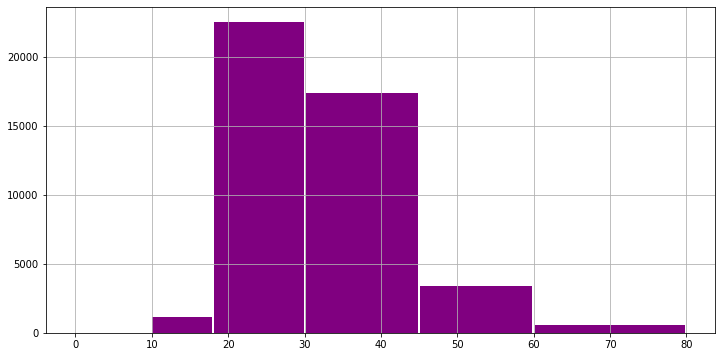

In [139]:
# survey_df['Age'].fillna(0).isna().sum()
plt.figure(figsize=(12,6))
survey_df['Age'][3]
plt.hist(survey_df.Age,bins=[0,10,18,30,45,60,80],rwidth=0.98,color='purple')
plt.grid()

In [142]:
survey_df['Age'] = survey_df['Age'].fillna(0)
conditions = [
    (df['Age'] > 10),
    (df['Age'] >= 10) & (df['Age'] <18),
    (df['Age'] >= 18) & (df['Age'] <30),
    (df['Age'] >= 30) & (df['Age'] <45),
    (df['Age'] >= 45) & (df['Age'] <60),
    (df['Age'] >= 60)
    ]
values = ['less than 10 years', '10-18  years', '18-30  years', '30-45  years','45-60  years','above 60  years']
# values = ['less than 10 years']

In [48]:
survey_df['Agedgrp'] = pd.DataFrame(np.select(conditions,values))

In [143]:
# survey_df.head(5)
aaa = survey_df.groupby('Gender')
aaa.get_group('Woman').head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Languages Spoken
34,United States,16.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,13.0,3.0,NaN,HTML/CSS;Java;JavaScript;Ruby,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Not employed, but looking for work","Designer;Developer, front-end",NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,NaN,English
39,United States,20.0,Woman,"Associate degree (A.A., A.S., etc.)",NaN,Yes,14.0,6.0,NaN,C;C#;C++;HTML/CSS;JavaScript;PHP;Python;SQL,...,Once a year,NaN,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN,English


In [44]:
# aaa.get_group('Age')
for k,v in aaa:
    print(v)

In [144]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [145]:
gender_counts = survey_df.Gender.value_counts(dropna=True)
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

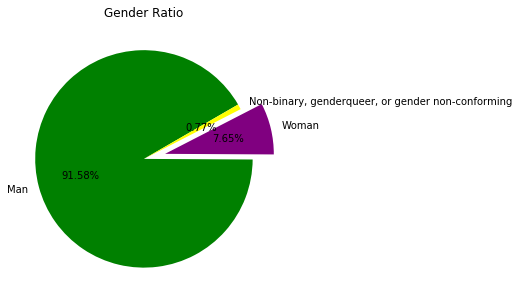

In [146]:
plt.figure(figsize=(10,5))
plt.title('Gender Ratio')
plt.pie(gender_counts,labels=gender_counts.index,autopct="%0.2f%%",explode=[0,0.2,0],startangle=30,colors=['g','purple','yellow'])
# gender_counts.index
plt.show()

In [147]:
we = survey_df.EdLevel.value_counts(dropna=True)
we

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

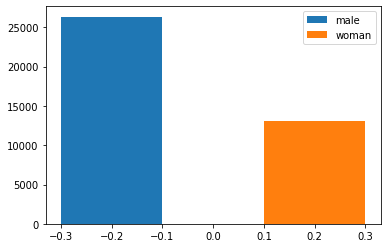

In [148]:
# sns.barplot(we.index,we)
plt.bar(0-0.2,we[0],width=0.2,label='male')
plt.bar(0+0.2,we[1],width=0.2,label='woman')
plt.legend()

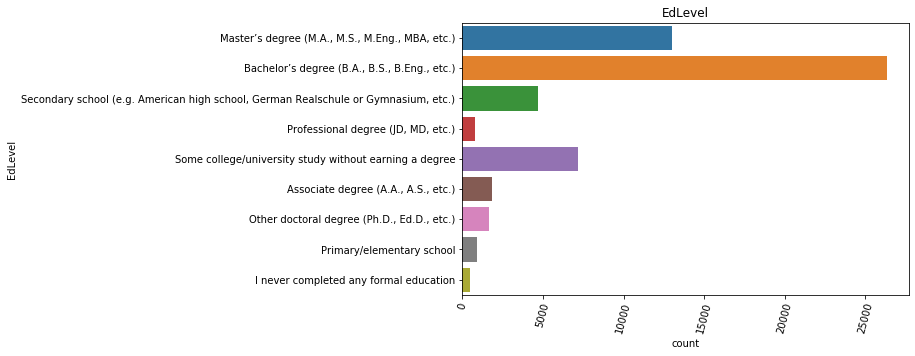

In [149]:
plt.figure(figsize=(8,5))
plt.title('EdLevel')
plt.xticks(rotation=75)
sns.countplot(y=survey_df.EdLevel)
plt.show()

In [150]:
ed = survey_df.EdLevel.value_counts()
ed

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

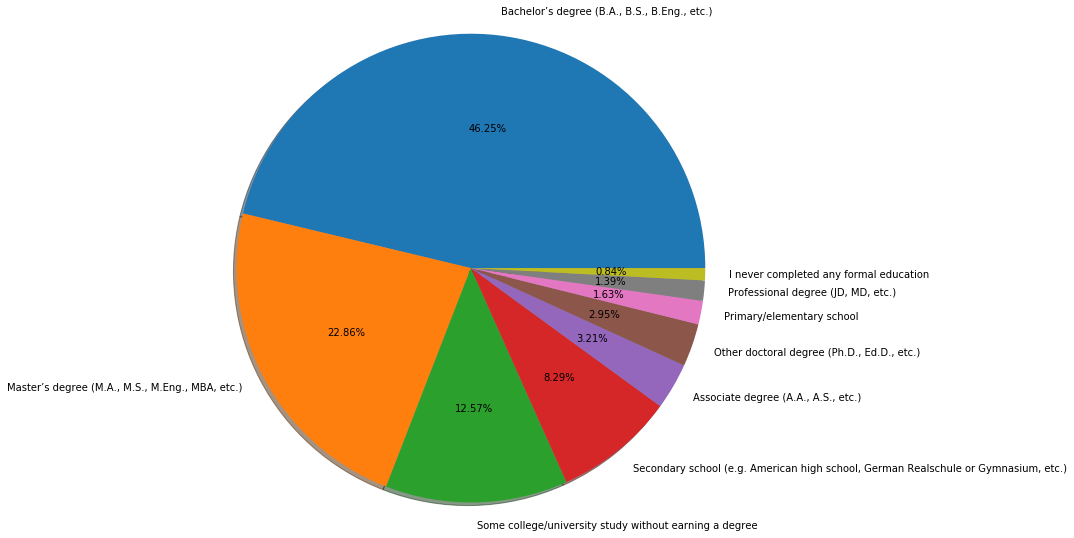

In [151]:
plt.figure(figsize=(7,10))
# plt.fontsize()
plt.pie(ed,labels=ed.index,autopct="%0.2f%%",radius=1.5,shadow=True)
plt.show()

In [152]:
fl = df.groupby('Gender')['EdLevel'].count()  # 48997
fl

Gender
Man                                                            45008
Man;Non-binary, genderqueer, or gender non-conforming            116
Non-binary, genderqueer, or gender non-conforming                371
Woman                                                           3742
Woman;Man                                                         70
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Woman;Non-binary, genderqueer, or gender non-conforming           92
Name: EdLevel, dtype: int64

In [153]:
fll = df.groupby('EdLevel')['Gender'].count()
fll

EdLevel
Associate degree (A.A., A.S., etc.)                                                    1610
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          22736
I never completed any formal education                                                  333
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       11265
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1467
Primary/elementary school                                                               800
Professional degree (JD, MD, etc.)                                                      663
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4205
Some college/university study without earning a degree                                 6345
Name: Gender, dtype: int64

In [154]:
m = df[df.Gender=='Man']
n = df[df.Gender=='Woman']
m.head(1)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27


### education level acc to MAN & WOMAN

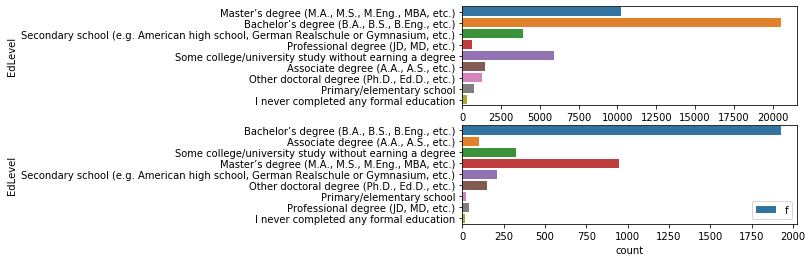

In [155]:
# plt.xticks(rotation=90)
fig, ax =plt.subplots(2,1)
sns.countplot(y = m.EdLevel,ax=ax[0],label='mssss')
sns.countplot(y = n.EdLevel,ax=ax[1],label='f')
plt.legend()
plt.show()

In [161]:
m.columns
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [162]:
imp = df.groupby('NEWEdImpt')['EdLevel'].count()  # 48997
imp

NEWEdImpt
Critically important                   4675
Fairly important                      12461
Not at all important/not necessary     7557
Somewhat important                    11184
Very important                        11632
Name: EdLevel, dtype: int64

In [163]:
lis = ['Critically important','Fairly important','Not at all important/not necessary','Somewhat important','Very important']
ff = survey_df['NEWEdImpt'].isin(lis)
edu = survey_df.loc[ff]   # 48231 64461

In [164]:
survey_df.fillna({
    'NEWEdImpt':'noneed'
},inplace=True)


lis2 = ['noneed']
ff2 = survey_df['NEWEdImpt'].isin(lis2)
noedu = survey_df.loc[ff2]

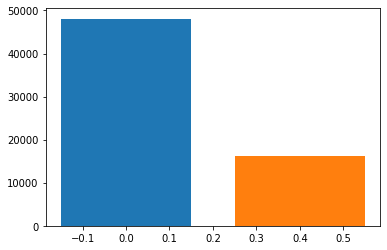

In [165]:
edu_count = edu['NEWEdImpt'].value_counts().sum()
noedu_count = noedu['NEWEdImpt'].value_counts().sum()
plt.bar(0,edu_count,width=0.3)
plt.bar(0.4,noedu_count,width=0.3)
plt.show()

In [166]:
schema.UndergradMajor

'What was your primary field of study?'

In [167]:
each_course = survey_df.UndergradMajor.value_counts()
total_course = survey_df.UndergradMajor.count()

In [168]:
undergrad_pct = each_course*100/(total_course)

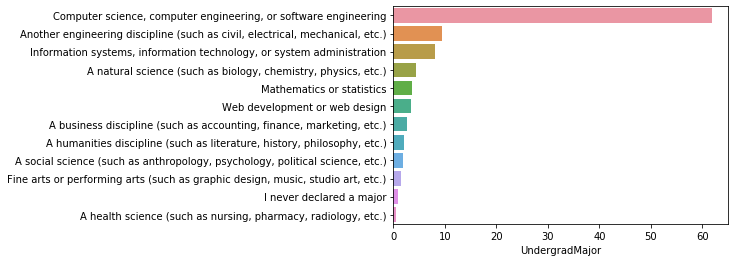

In [169]:
sns.barplot(y = undergrad_pct.index,x = undergrad_pct)
plt.show()

In [172]:
edulis = ['Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'Information systems, information technology, or system administration',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Mathematics or statistics', 'Web development or web design',
       'A business discipline (such as accounting, finance, marketing, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A health science (such as nursing, pharmacy, radiology, etc.)']


filter_eng = survey_df['UndergradMajor'].str.contains('Computer science, computer engineering, or software engineering',na = False)
# OR filter_eng = survey_df['UndergradMajor'].isin(['Computer science, computer engineering, or software engineering'])


edulis_filter = survey_df['UndergradMajor'].isin(edulis)
edu_nocomp = survey_df.loc[edulis_filter]
edu_comp = survey_df.loc[filter_eng]

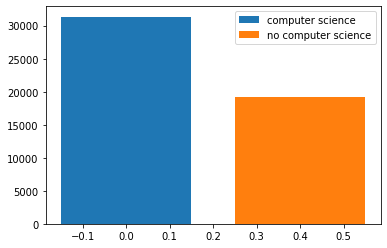

In [173]:
edu_count = edu_comp['UndergradMajor'].value_counts().sum()
noedu_count = edu_nocomp['UndergradMajor'].value_counts().sum()
plt.bar(0,edu_count,width=0.3,label='computer science')
plt.bar(0.4,noedu_count,width=0.3,label='no computer science')
plt.legend()
plt.show()

### employment

In [174]:
schema.Employment

'Which of the following best describes your current employment status?'

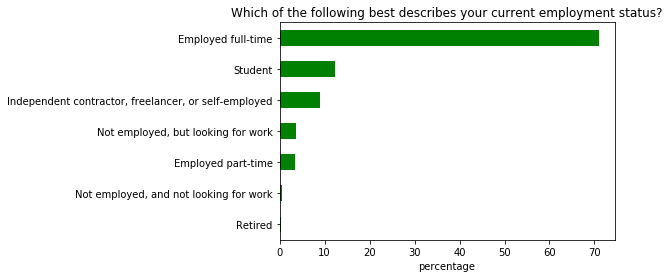

In [175]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='g')
plt.title(schema.Employment)
plt.xlabel('percentage')
plt.show()

In [176]:
empcond =[
         (survey_df['Employment']=='Student') | (survey_df['Employment']=='Not employed, but looking for work'),
    (survey_df['Employment']=='Employed part-time') | (survey_df['Employment']=='Employed full-time')|(survey_df['Employment']=='freelancer'),
        (survey_df['Employment']=='Not employed, and not looking for work') | (survey_df['Employment']=='Retired')
]
empvalue = ['enthusiast','professional','other']

In [177]:
survey_df['EmploymentType'] = np.select(empcond,empvalue)

In [178]:
prof_num = survey_df[survey_df['EmploymentType']=='professional'].count()
enth_num = survey_df[survey_df['EmploymentType']=='enthusiast'].count()

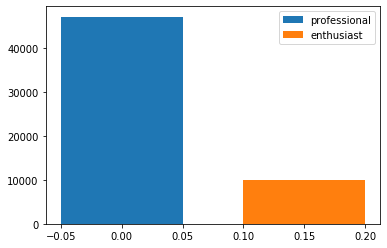

In [179]:
plt.bar(0,prof_num,width=0.1,label='professional')
plt.bar(0.15,enth_num,width=0.1,label='enthusiast')
plt.legend()
plt.show()

In [180]:
schema.DevType
# survey_df.DevType.to_frame()[['Developer, full-stack;Developer, mobile']]

'Which of the following describe you? Please select all that apply.'

In [181]:
# ['Developer, desktop or enterprise applications', 'Developer, full-stack']
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [182]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df.head(2)

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [183]:
dev_type_total = dev_type_df.sum().sort_values(ascending=False)
dev_type_total

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

## which is most popula prog lang

In [184]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [185]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [186]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64301                                                  NaN
64302    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64303                                                  NaN
64304                                             HTML/CSS
64305                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [192]:
survey_df.LanguageDesireNextYear

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64301                                                  NaN
64302    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64303                                                  NaN
64304                             HTML/CSS;Java;JavaScript
64305                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64306, dtype: object

In [193]:
language_worked_with = split_multicolumn(survey_df.LanguageWorkedWith)
language_worked_with

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64302,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64304,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
lang_percentage = language_worked_with.mean().sort_values(ascending=False)*100
lang_percentage

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

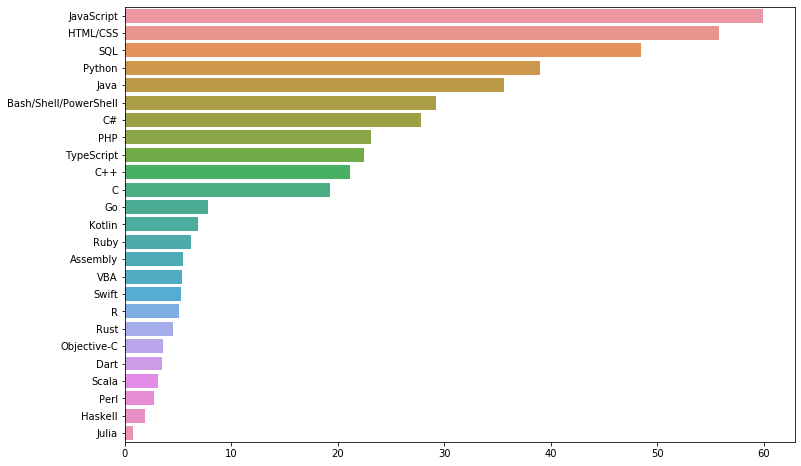

In [195]:
plt.figure(figsize=(12,8))
sns.barplot(y=lang_percentage.index,x=lang_percentage)
plt.show()

## Q1

In [196]:
schema.Employment

'Which of the following best describes your current employment status?'

In [259]:
survey_df = pd.merge(survey_df,language_worked_with,left_index=True,right_index=True)
# survey_df = pd.concat([aa,language_worked_with],axis=1)
survey_df.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,VBA_y,Perl_y,Scala_y,C++_y,Go_y,Haskell_y,Rust_y,Dart_y,Julia_y,Assembly_y
0,Germany,0.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,False,False,False,False,False,False,False,False,False,False
1,United Kingdom,0.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,False,False,False,False,False,False,False,False,False,False


In [215]:
prog_list= [
'JavaScript',
'HTML/CSS',
'SQL',
'Python',
'Java',
'Bash/Shell/PowerShell',
'C#',
'PHP',
'TypeScript',
'C++',
'C',
'Go',
'Kotlin',
'Ruby',
'Assembly',
'VBA',
'Swift',
'R',
'Rust',
'Objective-C',
'Dart',
'Scala',
'Perl',
'Haskell',
'Julia',
]
prof_cond = (survey_df['Employment']=='Employed part-time') | (survey_df['Employment']=='Employed full-time')|(survey_df['Employment']=='freelancer')
student_lang = survey_df[prog_list][survey_df.Employment=='Student']
prof_lang = survey_df.loc[prof_cond,prog_list]

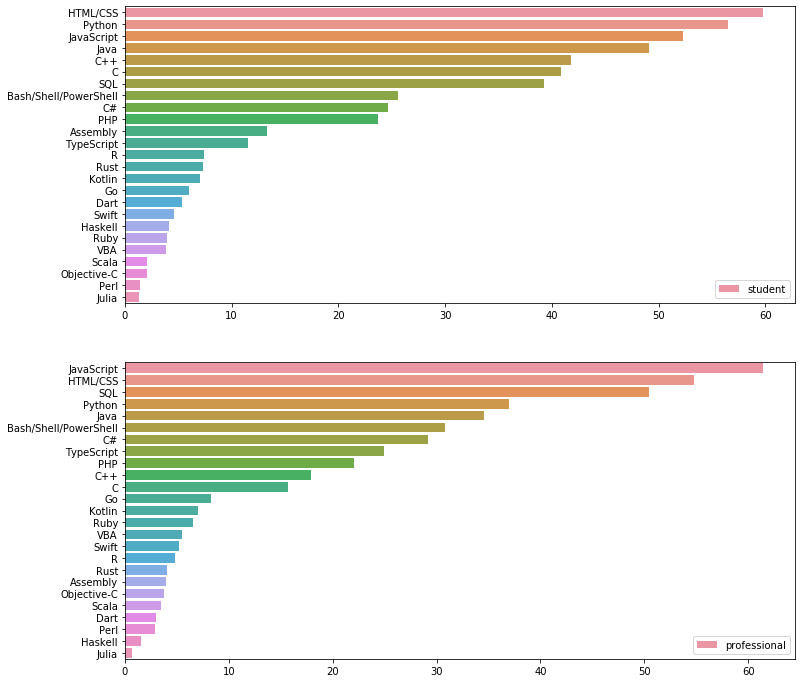

In [216]:
stud_prog = student_lang.mean().sort_values(ascending=False)*100
prof_prog = prof_lang.mean().sort_values(ascending=False)*100
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
sns.barplot(y = stud_prog.index,x = stud_prog,label='student')
plt.legend()
plt.subplot(2,1,2)
sns.barplot(y = prof_prog.index,x = prof_prog,label='professional')
plt.legend()
plt.show()

### q2

In [209]:
survey_df = pd.merge(survey_df,dev_type_df,left_index=True,right_index=True)

In [223]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Languages Spoken', 'EmploymentType',
       'Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', 'Designer',
       'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
       'DevOps specialist', 'Developer, game or graphics',
       'Database administrator', 'Developer, embedded applications or devices',
       'Engineer, data', 'Educator', 'System administrator',
       'Engineering manager', 'Product manager', 'Data or business analyst',
       'Academic researcher', 'Data scientist or machine learning specialist',
       'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or s

In [247]:
frontend_cmnlang = survey_df[prog_list][survey_df['Developer, front-end']==False]

In [248]:
frontend_plot = frontend_cmnlang.mean().sort_values(ascending=False)*100

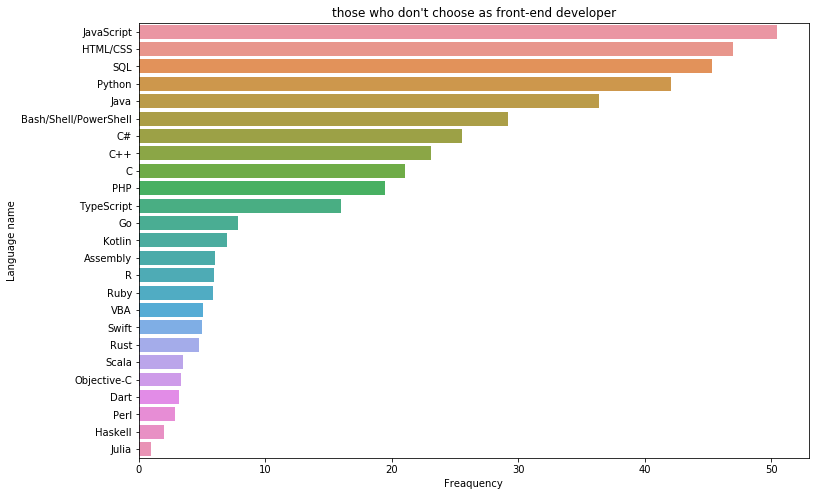

In [262]:
plt.figure(figsize=(12,8))
sns.barplot(x=frontend_plot,y=frontend_plot.index)
plt.title('those who don\'t choose as front-end developer')
plt.xlabel('Freaquency')
plt.ylabel('Language name')
plt.show()